## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression

sns.set()

## Loading the data

In [2]:
data = pd.read_csv('Raw Data.csv')
data.columns

Index(['Overall', 'Weak Foot', 'Skill Moves', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

## Data description

In [3]:
data.head()
data.describe()

,Overall,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,66.249904,2.947299,2.361308,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,6.914613,0.660456,0.756164,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,46.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,62.000000,3.000000,2.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,66.000000,3.000000,2.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,71.000000,3.000000,3.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,94.000000,5.000000,5.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


## Declaring the variables

In [4]:
x = data[['Weak Foot','Skill Moves','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle']]
y = data['Overall']

## Performing the Regression

In [5]:
reg = LinearRegression()

In [6]:
print(reg.fit(x,y))

LinearRegression()


In [7]:
reg.coef_

array([ 0.086059  ,  1.01595348,  0.02844405,  0.00701096, -0.02237119,
        0.04799857, -0.00989581, -0.03716759,  0.00844808, -0.00883549,
        0.00651912,  0.04687358,  0.01751185,  0.01984379, -0.00124433,
        0.47746373, -0.05188722,  0.01838006,  0.03248484, -0.00962598,
        0.05975356, -0.00479332, -0.0144503 , -0.00607469, -0.08124189,
        0.02459297, -0.01597853,  0.14875982,  0.00823589, -0.00754877,
       -0.02009729])

In [8]:
reg.intercept_

21.630941189025954

In [9]:
reg.score(x,y)

0.7975833507883922

## Finding the adjusted R^2

In [10]:
def adj_r2(x,y):
    r2 = reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2 

In [11]:
adj_r2(x,y)

0.7972371867168105

## Feature Selection

In [12]:
f_regression(x,y)

(array([  854.58107915,  3765.91302917,  3356.11175867,  2257.10829772,
         2385.57219029,  6135.13536938,  3283.5194412 ,  2923.94914188,
         3877.46361417,  3394.93479908,  5551.85024753,  4878.47407171,
          732.09035664,   843.07689259,  1370.84273875, 47291.63629752,
          195.30430985,  4386.65223273,  1365.09657394,  2802.35789038,
         2523.63565628,  3906.80202892,  3366.14535603,  2090.5739111 ,
         2643.47695964,  6016.71701496,  2395.9274443 , 20432.39005928,
         1623.70235094,  1237.80117792,   948.48884336]),
 array([1.28909683e-183, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        4.24115331e-158, 3.15953868e-181, 2.37657662e-289, 0.00000000e+000,
        3.74438025e-044, 0.00000000e+000, 3.44461757e-288, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,

In [13]:
pd.DataFrame({'Features': ['Weak Foot','Skill Moves','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle'],'P Statistic':f_regression(x,y)[1]})

,Features,P Statistic
0,Weak Foot,1.289097e-183
1,Skill Moves,0.000000e+00
2,Crossing,0.000000e+00
3,Finishing,0.000000e+00
4,HeadingAccuracy,0.000000e+00
5,ShortPassing,0.000000e+00
6,Volleys,0.000000e+00
7,Dribbling,0.000000e+00
8,Curve,0.000000e+00
9,FKAccuracy,0.000000e+00


## Plotting Individual Features against overall scores

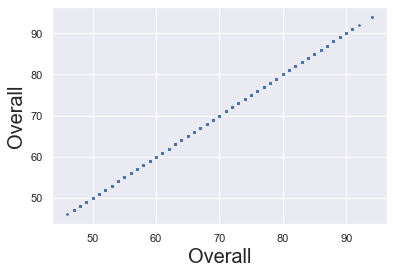

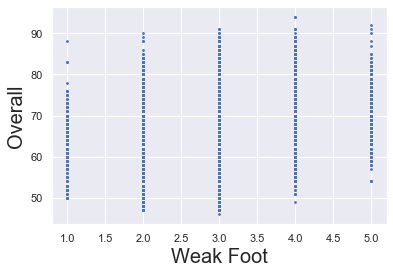

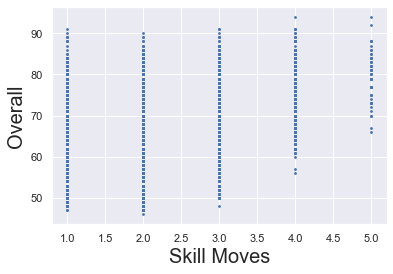

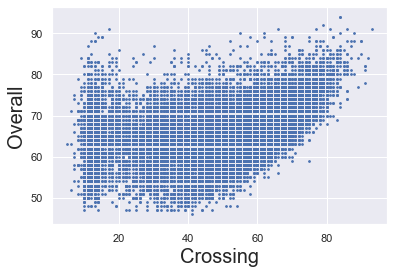

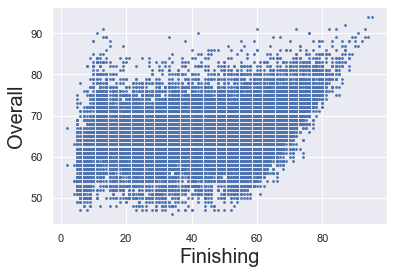

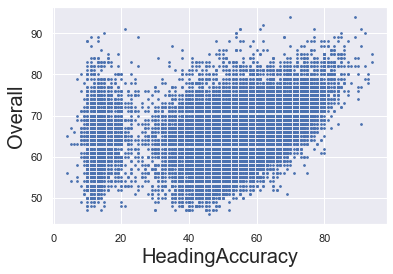

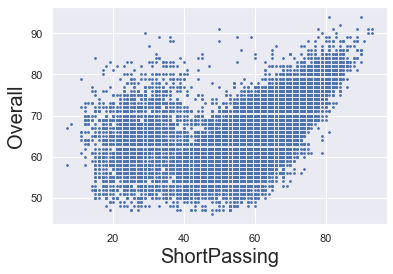

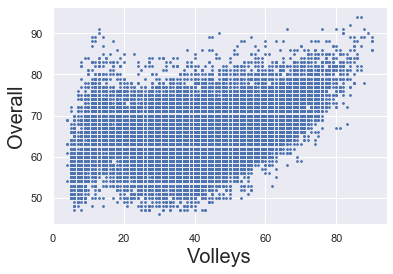

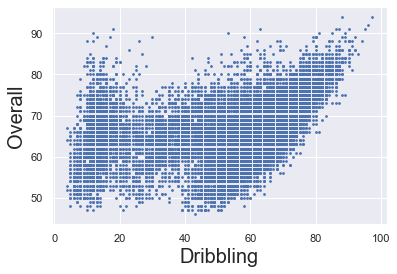

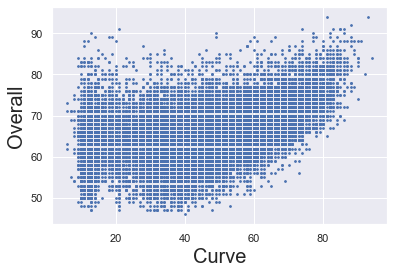

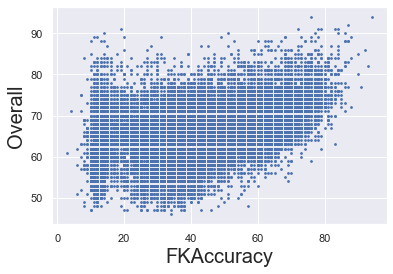

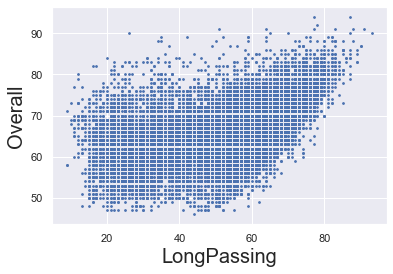

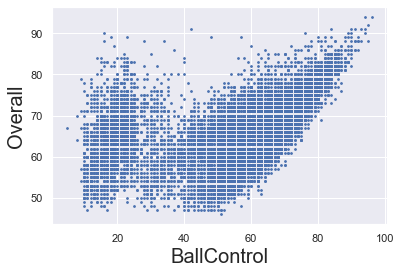

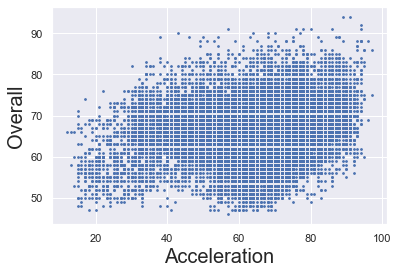

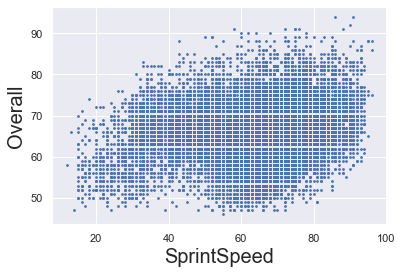

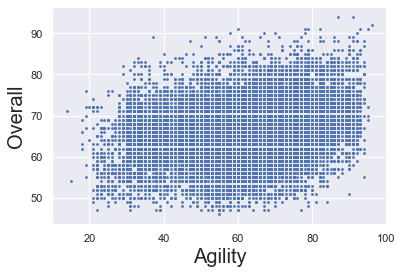

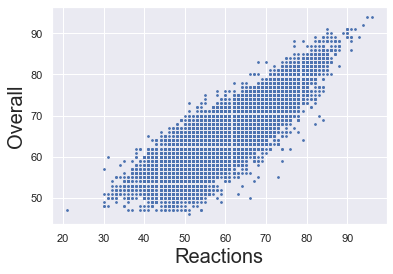

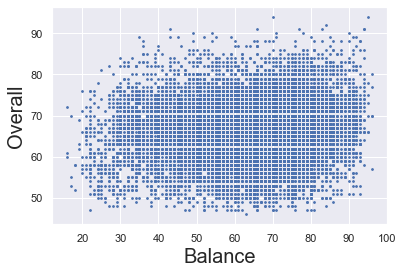

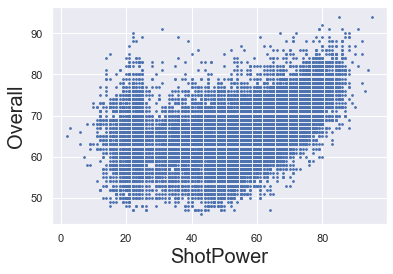

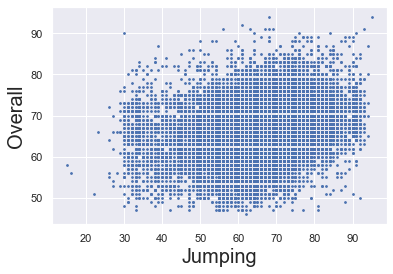

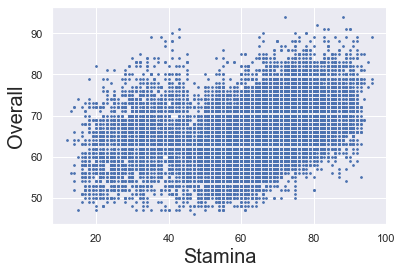

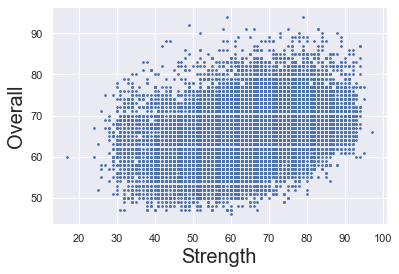

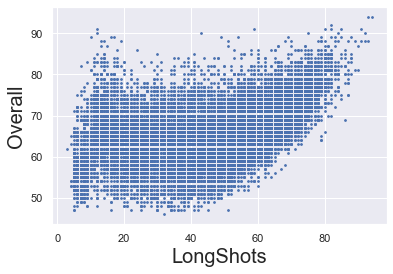

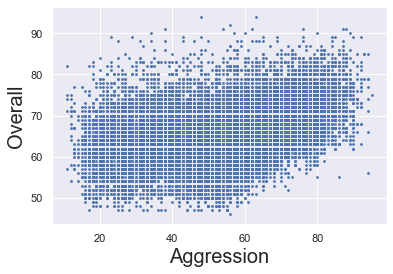

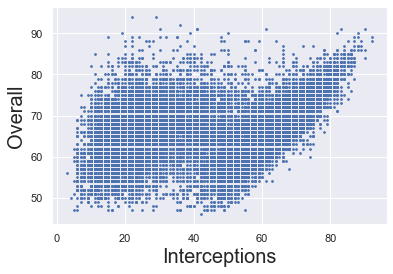

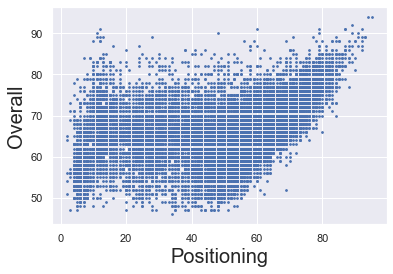

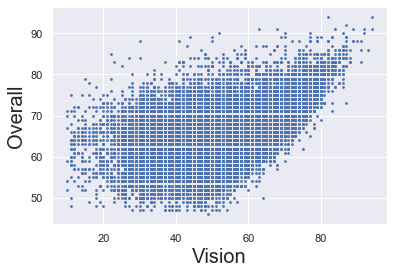

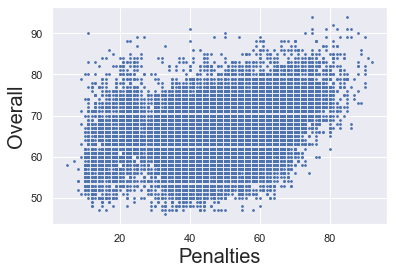

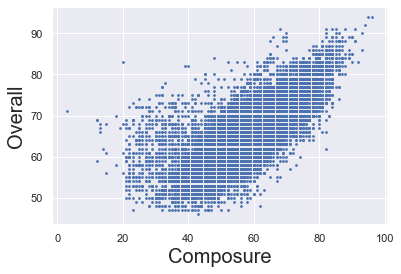

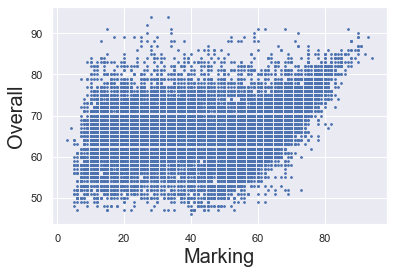

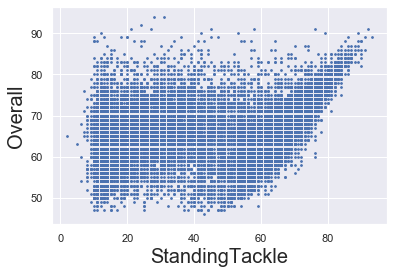

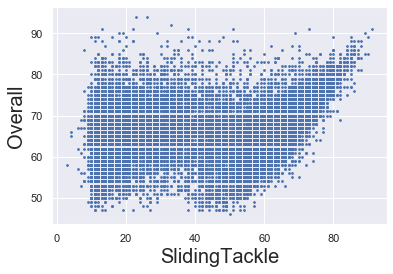

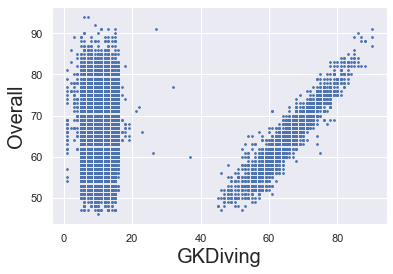

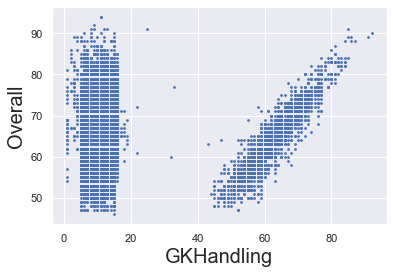

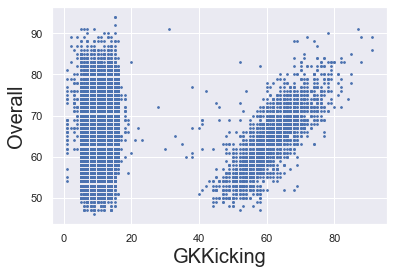

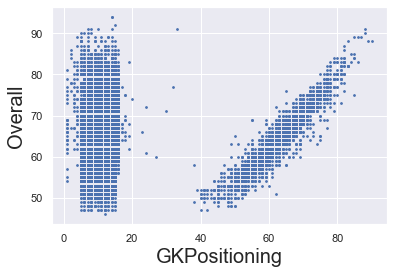

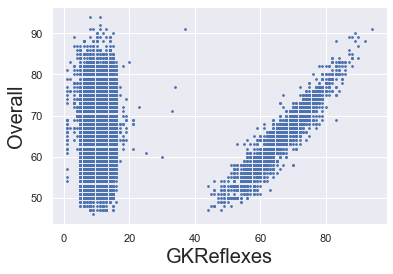

In [14]:
for i in range(0,len(data.columns)):
    x2 = data[data.columns[i]]
    plt.scatter(x2,y, s = 3)
    plt.xlabel(data.columns[i],fontsize=20)
    plt.ylabel('Overall',fontsize=20)
    plt.show()